##  This notebook is specifically for the datasets with NO detailed job description.
Every day start at 10pm
Scrape data from Indeed to create 3 csv datasets based on:
'data science, data scientist' 
'data analyst, data analytics'
'machine learning'

In [1242]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from library.sb_utils import save_file

today = datetime.today().strftime('%Y_%m_%d')
dfNames=['da','ds','ml']

list_of_df = []
data = pd.DataFrame()
print(data.shape)

for n in dfNames:
    fileName = '../data/raw/{0}_last{1}d_{2}.csv'.format(n,'1', '2021_02_17')
    df = pd.read_csv(fileName)
    #df = pd.read_csv(fileName, skiprows=[0])
    
    #De-dup records within each file
    df.drop_duplicates(subset ='JobID', inplace=True)
    print(df.shape)
    list_of_df.append(df)
    data = data.append(df, ignore_index=True)
    print(data.shape)


(0, 0)
(1006, 11)
(1006, 11)
(1009, 11)
(2015, 11)
(673, 11)
(2688, 11)


In [1243]:
data.shape

(2688, 11)

In [1244]:
# To merge the 3 daily files to one. 
id_0 = set(list_of_df[0].JobID)
id_1 = set(list_of_df[1].JobID)
id_2 = set(list_of_df[2].JobID)

In [1245]:
print(len(id_0.intersection(id_1)))
print(len(id_0.intersection(id_2)))
print(len(id_1.intersection(id_2)))

279
77
168


In [1246]:
list_of_df[0].head()
list_of_df[0].dtypes

JobID             object
JobTitle          object
Company           object
Location          object
CompanyRating    float64
PostDate          object
ExtractDate       object
Summary           object
Salary            object
Remote            object
JobUrl            object
dtype: object

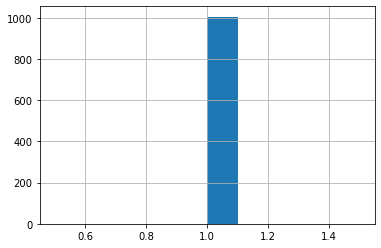

In [1247]:
list_of_df[0].JobID.value_counts().hist()

In [1248]:
list_of_df[0].JobID.describe()

count                 1006
unique                1006
top       9cc22012c47d23b4
freq                     1
Name: JobID, dtype: object

In [1249]:
list_of_df[0].drop_duplicates(subset ='JobID', inplace=True)# .JobID.describe()

In [1250]:
list_of_df[0].JobID.describe()  
# before dedup 1105 , after 1006 

count                 1006
unique                1006
top       9cc22012c47d23b4
freq                     1
Name: JobID, dtype: object

In [1251]:
list_of_df[0].JobID.is_unique

True

In [1252]:
list_of_df[1].shape

(1009, 11)

In [1253]:
list_of_df[1].JobID.describe()

count                 1009
unique                1009
top       9cc22012c47d23b4
freq                     1
Name: JobID, dtype: object

In [1254]:
list_of_df[1].drop_duplicates(subset='JobID', inplace= True)

In [1255]:
list_of_df[1].JobID.describe()  
#before dedup 1111, after 1009

count                 1009
unique                1009
top       9cc22012c47d23b4
freq                     1
Name: JobID, dtype: object

In [1256]:
list_of_df[2].JobID.describe()

count                  673
unique                 673
top       7f9c75aee15cf018
freq                     1
Name: JobID, dtype: object

In [1257]:
list_of_df[2].drop_duplicates(subset='JobID', inplace= True)
#before dedup 726, after 673 

In [1258]:
list_of_df[2].JobID.describe()

count                  673
unique                 673
top       7f9c75aee15cf018
freq                     1
Name: JobID, dtype: object

In [1259]:
#data = pd.read_csv('../data/raw/ml_last7d_2021_02_13.csv',skiprows=[0])
data.columns

Index(['JobID', 'JobTitle', 'Company', 'Location', 'CompanyRating', 'PostDate',
       'ExtractDate', 'Summary', 'Salary', 'Remote', 'JobUrl'],
      dtype='object')

In [1260]:
data.head(5)


,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,JobUrl
0,67e59f81b2d0a39f,Financial Analyst,CNH Finance,Remote,NaN,Today,2021-02-17,CNH is seeking detailed oriented financial ana...,"$77,000 - $108,803 a year",NaN,https://www.indeed.com/viewjob?jk=67e59f81b2d0...
1,e2136c600da99f1f,Data Analyst,Aston Carter,"New York, NY",3.7,Just posted,2021-02-17,Identify required reference data needs and des...,$60 an hour,NaN,https://www.indeed.com/viewjob?jk=e2136c600da9...
2,f796a227ba4799bd,Data/Tech Analyst,Proud Moments,"Brooklyn, NY",3.5,Today,2021-02-17,"Strong knowledge of data migration/ETL, data m...",NaN,NaN,https://www.indeed.com/viewjob?jk=f796a227ba47...
3,c7cce5cf3fe8196e,Investigative Analyst Supporting the DEA,Forfeiture Support Associates,"Roanoke, VA",3.7,Today,2021-02-17,Accurately enters required data into one or mo...,NaN,NaN,https://www.indeed.com/viewjob?jk=c7cce5cf3fe8...
4,beff0745ea6499af,PRICING ANALYST I,Pilkington North America Inc.,"Grove City, OH",3.4,Today,2021-02-17,Conducts the analytics and manages data necess...,NaN,NaN,https://www.indeed.com/viewjob?jk=beff0745ea64...


### Step 1: De - duplicate records with same JobID
There are overlaps after combining 3 files together


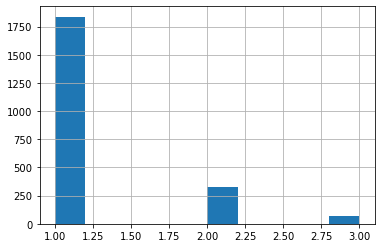

In [1261]:
data.JobID.value_counts().hist()

In [1262]:
#Group by column having count > 1 
#data.groupby('JobID').filter(lambda x: len(x) >1 ).sort_values('JobID')

In [1263]:
data.JobID.describe()

count                 2688
unique                2230
top       d41cc7ee2d6a1659
freq                     3
Name: JobID, dtype: object

In [1264]:
data.drop_duplicates(subset = 'JobID', inplace= True)
data.JobID.describe()

count                 2230
unique                2230
top       9ab8d241748fcc57
freq                     1
Name: JobID, dtype: object

In [1329]:
# Reindex 
data.index = np.arange(0,len(data))

### Step 2: Create a new variable as the exact date for posted date

In [1265]:
data.PostDate.unique()

array(['Today', 'Just posted', '1 day ago'], dtype=object)

In [1266]:
data.PostDate.str.contains('ago').sum()

36

In [1267]:
'|'.join(['ago','day','days'])

'ago|day|days'

In [1268]:
# Create a new variable 'DatePosted' by remove the string and convert to int
data['DatePosted'] = data.PostDate.str.replace('day ago|days ago','').str.replace('Today|Just posted','0').str.strip().astype(int)

In [1269]:
data.DatePosted.unique()

array([0, 1])

In [1270]:
data.dtypes

JobID             object
JobTitle          object
Company           object
Location          object
CompanyRating    float64
PostDate          object
ExtractDate       object
Summary           object
Salary            object
Remote            object
JobUrl            object
DatePosted         int32
dtype: object

In [1271]:
# Convert to datetime type
data['ExtractDate'] = pd.to_datetime(data['ExtractDate'])

In [1272]:
# Convert to timeDelta type
data.DatePosted = pd.to_timedelta(data.DatePosted, unit='D')
data.DatePosted = pd.to_datetime(data['ExtractDate'] - data['DatePosted'])


In [1273]:
data.loc[:,['PostDate','ExtractDate','DatePosted']]

,PostDate,ExtractDate,DatePosted
0,Today,2021-02-17,2021-02-17
1,Just posted,2021-02-17,2021-02-17
2,Today,2021-02-17,2021-02-17
3,Today,2021-02-17,2021-02-17
4,Today,2021-02-17,2021-02-17
...,...,...,...
2683,Just posted,2021-02-17,2021-02-17
2684,Just posted,2021-02-17,2021-02-17
2685,Just posted,2021-02-17,2021-02-17
2686,Just posted,2021-02-17,2021-02-17


### Step 3: Consolidate Remote information from Location and Remote columns

In [1274]:
data.Remote.unique()

array([nan, 'Temporarily remote', 'Remote'], dtype=object)

In [1275]:
data.Remote.describe()

count        396
unique         2
top       Remote
freq         261
Name: Remote, dtype: object

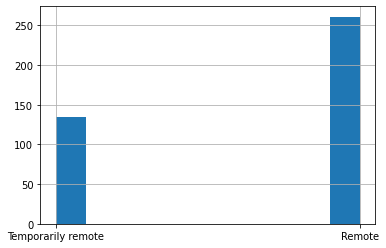

In [1276]:
data.Remote.hist()

In [1277]:
# Assign value of Remote if the value of location is 'Remote'
data.loc[data.Location.str.contains('Remote'),'Remote'] = 'Remote'

In [1278]:
data.Remote.describe()

count        571
unique         2
top       Remote
freq         436
Name: Remote, dtype: object

In [1279]:
# Convert the type of Remote to boolean
data['isRemote'] = data['Remote'] == 'Remote'
data.isRemote.describe()

count      2230
unique        2
top       False
freq       1794
Name: isRemote, dtype: object

### Step 4: Extract city, state information from Location 

In [1280]:
data.Location.describe()

count       2230
unique       641
top       Remote
freq         175
Name: Location, dtype: object

In [1281]:
# Create two new variables City and State
newDf = data.Location.str.split(pat =',',expand =True)
data['City'] = newDf[0]
data['State'] = newDf[1]

In [1282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2687
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   JobID          2230 non-null   object        
 1   JobTitle       2230 non-null   object        
 2   Company        2230 non-null   object        
 3   Location       2230 non-null   object        
 4   CompanyRating  1736 non-null   float64       
 5   PostDate       2230 non-null   object        
 6   ExtractDate    2230 non-null   datetime64[ns]
 7   Summary        2230 non-null   object        
 8   Salary         355 non-null    object        
 9   Remote         571 non-null    object        
 10  JobUrl         2230 non-null   object        
 11  DatePosted     2230 non-null   datetime64[ns]
 12  isRemote       2230 non-null   bool          
 13  City           2230 non-null   object        
 14  State          1967 non-null   object        
dtypes: bool(1), datetime6

In [1283]:
# Cleaning up values of City
data.loc[data.City == 'Remote', 'City'] = np.nan
data.loc[data.City == 'United States', 'City'] = np.nan

In [1284]:
assert data.City.str.contains('Remote|United States').any()  == False

In [1285]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [1286]:
# Extract State abbrevation value from City variables to fill those missing values
data.loc[((data.State.isnull()) & (data.City != 'Remote') & (data.City != 'United States')), 'State']  = data.loc[((data.State.isnull()) & (data.City != 'Remote') & (data.City != 'United States')), 'City'].str.replace(' State','').map(us_state_abbrev)

In [1287]:
# Cleaning up the State values
data.State= data.State.str.strip()

In [1288]:
data.State.unique()

array([nan, 'NY', 'VA', 'OH', 'NJ', 'MA', 'PA', 'DC', 'CA', 'KY', 'GA',
       'TN', 'NE', 'DE', 'MD', 'MN', 'MO', 'IN', 'TX', 'FL', 'MI', 'NC',
       'WI', 'IA', 'CT', 'IL', 'CO', 'SC', 'OR', 'NH', 'UT', 'WA', 'ND',
       'KS', 'LA', 'AL', 'AZ', 'VT', 'OK', 'RI', 'NV', 'ID', 'NM', 'HI',
       'SD', 'ME', 'AR', 'WY', 'AK', 'PR', 'MS', 'MT'], dtype=object)

In [1289]:
# Categorize state value into 4 regions 
us_state_regions = {
    'Alabama': 'South',
    'Alaska': 'West',
    'American Samoa': 'Islands',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'South',
    'District of Columbia': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Guam': 'Islands',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'South',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Northern Mariana Islands':'Islands',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Puerto Rico': 'Islands',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virgin Islands': 'Islands',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

In [1290]:
us_state_regions_mapping =  {v: us_state_regions[k] for k, v in us_state_abbrev.items()}

In [1291]:
data['Regions'] = data.loc[~data.State.isnull(),'State'].map(us_state_regions_mapping).astype('category')

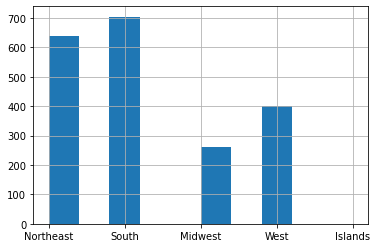

In [1292]:
data.Regions.hist()

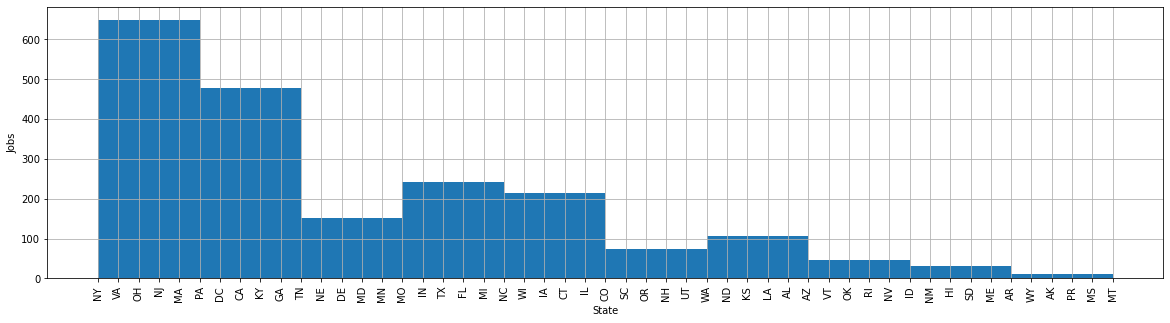

In [1293]:
# To do: Y label is not correct
plt.subplots(figsize=(20, 5))
data.State.hist()
plt.xticks(rotation='vertical')
plt.ylabel('Jobs')
plt.xlabel('State');
plt.show()

In [1294]:
data.groupby('City').filter(lambda x: len(x) >3 )['City'].value_counts().sort_values(ascending=False)

New York        134
Seattle          54
Washington       50
Atlanta          47
Chicago          44
               ... 
Ann Arbor         4
Iselin            4
Wichita           4
Norfolk           4
Redwood City      4
Name: City, Length: 113, dtype: int64

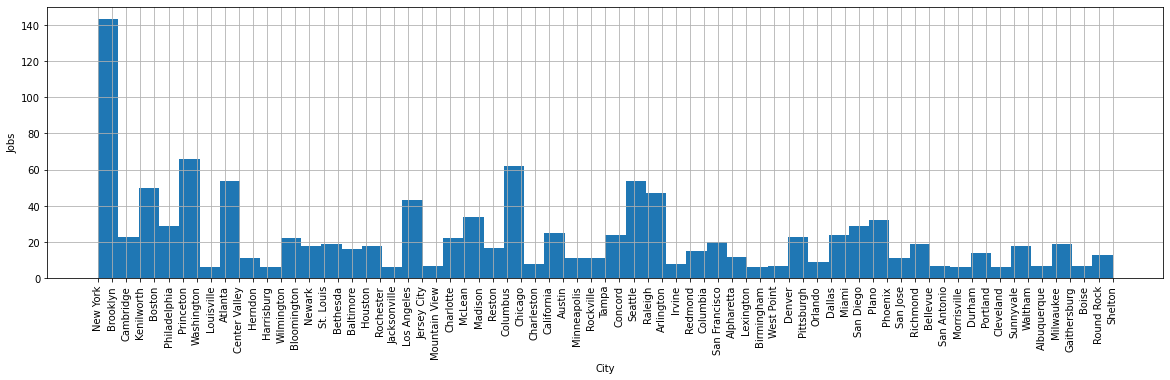

In [1295]:
# To Do: the Y label is not correct   ????  bins size
plt.subplots(figsize=(20, 5))
data.groupby('City').filter(lambda x: len(x) >5 )['City'].hist(bins =50)
plt.xticks(rotation='vertical')
plt.ylabel('Jobs')
plt.xlabel('City');
plt.show()

In [1296]:
data.City.value_counts()

New York            134
Seattle              54
Washington           50
Atlanta              47
Chicago              44
                   ... 
Salt Lake County      1
Rice                  1
Bridgeton             1
Menlo Park            1
Covington             1
Name: City, Length: 607, dtype: int64

In [1297]:
data.City.str.contains('Princeton').sum()

16

### Step 5: Extract senior, junior information from job Title

In [1298]:
data.JobTitle.unique()

array(['Financial Analyst', 'Data Analyst', 'Data/Tech Analyst', ...,
       'MLOps Systems Architect Sr. Staff',
       'Senior Full-stack Software Developer',
       'Principal Full-Stack Software Developer'], dtype=object)

In [1299]:
data['JobTitle'] = data['JobTitle'].astype('str')
type(data.JobTitle[0])

str

In [1300]:
data['isSenior'] = data.JobTitle.str.contains('Senior|Sr|sr|Director|VP|Lead|Principal')

In [1301]:
data['isJunior'] = data.JobTitle.str.contains('Junior|Jr|jr|Intern')

In [1302]:
data['isMid'] = data.JobTitle.str.contains('Mid Level|Mid-')

In [1303]:
data.loc[:, ['JobTitle','isSenior','isJunior','isMid']].head(3)

,JobTitle,isSenior,isJunior,isMid
0,Financial Analyst,False,False,False
1,Data Analyst,False,False,False
2,Data/Tech Analyst,False,False,False


In [1304]:
data[data.JobTitle.str.contains('Mid Level|Mid-')]

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,JobUrl,DatePosted,isRemote,City,State,Regions,isSenior,isJunior,isMid
427,4aab66f7a54e5cf2,Data Scientist II - Mid Level (Remote),USAA,"San Antonio, TX",3.9,Today,2021-02-17,Must complete 12 months in current position (f...,NaN,Remote,https://www.indeed.com/viewjob?jk=4aab66f7a54e...,2021-02-17,True,San Antonio,TX,South,False,False,True
754,77a7cc5a6f8db35f,Mid Level Research Analyst ( Able to Obtain Se...,"Lockwood Hills Federal, LLC","Williamsburg, KY",NaN,Today,2021-02-17,Bachelor’s Degree or 4 years of experience rel...,NaN,NaN,https://www.indeed.com/viewjob?jk=77a7cc5a6f8d...,2021-02-17,False,Williamsburg,KY,South,False,False,True
1003,d9f9364f1f052dd1,"Mid Level SDET @ Rockville, MD",Urbane Systems,"Rockville, MD",NaN,Today,2021-02-17,Plan test schedules or strategies in accordanc...,NaN,NaN,https://www.indeed.com/viewjob?jk=d9f9364f1f05...,2021-02-17,False,Rockville,MD,South,False,False,True
1243,dd7844d709745cb5,Mid-level Big Data Developer,Collective[i],Remote,2.5,Today,2021-02-17,Prior experience with developing ETL pipelines...,"$90,000 - $140,000 a year",Remote,https://www.indeed.com/viewjob?jk=dd7844d70974...,2021-02-17,True,NaN,NaN,NaN,False,False,True
1556,93b8de5b12ba89a3,Environmental Scientist (Mid-level),National Field Services,"Canonsburg, PA",NaN,Today,2021-02-17,Personal protective equipment provided or requ...,NaN,NaN,https://www.indeed.com/viewjob?jk=93b8de5b12ba...,2021-02-17,False,Canonsburg,PA,Northeast,False,False,True
2147,5a64c42a6bc48112,R&D Cybersecurity (Early/Mid-Career),Sandia National Laboratories,"Albuquerque, NM",4.2,Just posted,2021-02-17,"Engage with specialists in other domains, incl...",NaN,NaN,https://www.indeed.com/viewjob?jk=5a64c42a6bc4...,2021-02-17,False,Albuquerque,NM,West,False,False,True
2167,619fdc7176c29b60,Clinical Protocol Specialist - Mid-Atlantic,AlignTech,North Carolina,NaN,Today,2021-02-17,The Clinical Protocol Specialist is part of a ...,NaN,NaN,https://www.indeed.com/viewjob?jk=619fdc7176c2...,2021-02-17,False,North Carolina,NC,South,False,False,True
2533,2dc8ce4302e8a1c0,Solutions Architect (Mid-Career),Sandia National Laboratories,"Albuquerque, NM",4.2,Today,2021-02-17,The selected candidate will work along R&D sta...,NaN,NaN,https://www.indeed.com/viewjob?jk=2dc8ce4302e8...,2021-02-17,False,Albuquerque,NM,West,False,False,True


### Step 6: Categorize Salary variable 

In [1305]:
# string, dict, list appear as Object in df, however, the type can be tested as individual cell
#data.Salary = data.Salary.astype(str) # this cause missing value from NaN to 'nan'
type(data.Salary[0])


str

In [1306]:
# ?????? I don't know why this cannot get the result   ?????
data.Salary.str.contains('$103,690 - $134,798 a year').sum()

0

In [1307]:
data.loc[data.Salary =='$103,690 - $134,798 a year']

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,JobUrl,DatePosted,isRemote,City,State,Regions,isSenior,isJunior,isMid
202,35d68e6e82ab9fab,Analyst in Natural Resources Policy (Resilienc...,US Legislative Branch,"Washington, DC",4.2,Today,2021-02-17,Current or former federal employees must submi...,"$103,690 - $134,798 a year",NaN,https://www.indeed.com/viewjob?jk=35d68e6e82ab...,2021-02-17,False,Washington,DC,South,False,False,False
407,30dd4f03172dc79b,Budget Analyst,US Department of State,"Washington, DC",4.2,Today,2021-02-17,"U.S. citizens, nationals or those who owe alle...","$103,690 - $134,798 a year",NaN,https://www.indeed.com/viewjob?jk=30dd4f03172d...,2021-02-17,False,Washington,DC,South,False,False,False
1162,92966305833bb6ef,"Writer-Editor (Scientific), GS-1083-13 MP (Sci...",US Other Agencies and Independent Organizations,"Alexandria, VA",3.8,Today,2021-02-17,Duties Summary This position is in the Public ...,"$103,690 - $134,798 a year",Remote,https://www.indeed.com/viewjob?jk=92966305833b...,2021-02-17,True,Alexandria,VA,South,False,False,False
1194,ce249d7ccca12286,"Writer-Editor (Scientific), GS-1083-13 DE (Sci...",US Other Agencies and Independent Organizations,"Alexandria, VA",3.8,Today,2021-02-17,Selective Factor: I have demonstrated experien...,"$103,690 - $134,798 a year",Remote,https://www.indeed.com/viewjob?jk=ce249d7ccca1...,2021-02-17,True,Alexandria,VA,South,False,False,False


In [1308]:
# get the unit variable
data['SalaryUnit'] = data.Salary.str.extract('(an hour|a year|a month)', expand = True)
data['SalaryUnit'].unique()

array(['a year', 'an hour', nan, 'a month'], dtype=object)

In [1309]:
data['SalaryMidValue'] = data['Salary'].str.replace('an hour|a year|a month','').str.replace('$','').str.replace(',','')
#data.loc[~data.Salary.isnull(),['Salary','SalaryUnit','SalaryMidValue']].head(40)

In [1310]:
# Set busniss rule to treat range 
# Ignore 'Up to' and 'From' 
data['SalaryMidValue'] = data.SalaryMidValue.str.replace('Up to|From','').str.strip()
#data.SalaryMidValue.unique()

In [1311]:
# Take mid value for range salary
s_df = data.SalaryMidValue.str.split(pat ='-',expand =True)
s_df[1].fillna(s_df[0], inplace=True)

data['SalaryMidValue']  = (s_df[1].astype(float)+s_df[0].astype(float))/2


In [1312]:
data.loc[~data.Salary.isnull(),['Salary','SalaryUnit','SalaryMidValue']]

,Salary,SalaryUnit,SalaryMidValue
0,"$77,000 - $108,803 a year",a year,92901.5
1,$60 an hour,an hour,60.0
11,"$50,000 - $80,000 a year",a year,65000.0
13,$31 - $38 an hour,an hour,34.5
19,"$60,000 - $75,000 a year",a year,67500.0
...,...,...,...
2529,"$300,000 - $350,000 a year",a year,325000.0
2554,"$124,155 - $197,518 a year",a year,160836.5
2574,"$65,000 - $115,000 a year",a year,90000.0
2575,"$60,000 - $100,000 a year",a year,80000.0


In [1313]:
# Convert hourly rate to Salary based on formula hr * 40 * 52 
data.loc[data.SalaryUnit.str.contains('hour', na=False),'SalaryMidValue'] = data.SalaryMidValue * 40 * 52

In [1314]:
# Convert monthly rate to Salary based on formula mr * 52
data.loc[data.SalaryUnit.str.contains('month', na=False),'SalaryMidValue'] = data.SalaryMidValue * 52

In [1315]:
data.SalaryMidValue.describe()

count       355.000000
mean      90364.685915
std       49821.422949
min       22880.000000
25%       55560.000000
50%       83200.000000
75%      115000.000000
max      364000.000000
Name: SalaryMidValue, dtype: float64

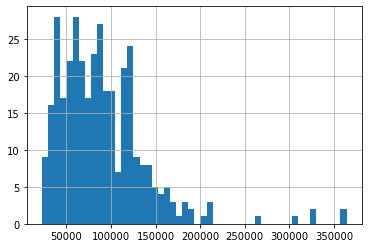

In [1316]:
data.SalaryMidValue.hist(bins =50)

In [1317]:
# Create SalaryGroup for SalaryMidValue variable
salaryGroupLabels = ['20K-50K','50K-75k','75k-100k','100k-125k','125k+']
salaryRanges =[20000, 50000, 75000, 100000, 125000, np.inf]
data['SalaryGroup'] = pd.cut(data.SalaryMidValue, bins = salaryRanges, labels = salaryGroupLabels)
#data['SalaryGroup'] = pd.qcut(data.SalaryMidValue, q=5, labels = salaryGroupLabels)
data.loc[~data.Salary.isnull(),['Salary','SalaryUnit','SalaryMidValue','SalaryGroup']]

,Salary,SalaryUnit,SalaryMidValue,SalaryGroup
0,"$77,000 - $108,803 a year",a year,92901.5,75k-100k
1,$60 an hour,an hour,124800.0,100k-125k
11,"$50,000 - $80,000 a year",a year,65000.0,50K-75k
13,$31 - $38 an hour,an hour,71760.0,50K-75k
19,"$60,000 - $75,000 a year",a year,67500.0,50K-75k
...,...,...,...,...
2529,"$300,000 - $350,000 a year",a year,325000.0,125k+
2554,"$124,155 - $197,518 a year",a year,160836.5,125k+
2574,"$65,000 - $115,000 a year",a year,90000.0,75k-100k
2575,"$60,000 - $100,000 a year",a year,80000.0,75k-100k


In [1318]:
data.SalaryGroup.value_counts().sort_index()

20K-50K      70
50K-75k      89
75k-100k     76
100k-125k    62
125k+        58
Name: SalaryGroup, dtype: int64

In [1319]:
((data.SalaryMidValue <= 125000) & (data.SalaryMidValue > 100000)).sum()

62

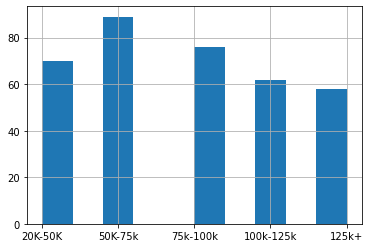

In [1320]:
data.SalaryGroup.sort_values().hist()

In [1321]:
assert data.SalaryMidValue.min() > 10000  

In [1322]:
(data.SalaryMidValue < 100000).sum()

231

In [1090]:
data.SalaryMidValue.isnull().sum()

1875

### Pandas profiling 

In [462]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [463]:
# uncomment and run below if you need to pip install the pandas-profiling library
#import sys
#!{sys.executable} -m pip install -U pandas-profiling==2.9.0
#!jupyter nbextension enable --py widgetsnbextension

In [464]:
from pathlib import Path

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [466]:
report = data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

In [1330]:
profile_report = data.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("../reports/pandas_profiling/{0}_daily.html".format('2021_02_17'))

In [636]:
#To do: 
# check missing state  : done ! 
# Categorize state: done !
# check dup id : done ! 
# salay categorizing : done!
# remove unneeded columns, save in the interim folder:

# Job Title: not for cleaning stage but later for EDA.  
# company frequency - company rating : not for cleaning stage but later for EDA. 
# location: not for cleaning stage but later for EDA. 


In [1331]:
data.State.unique()

array([nan, 'NY', 'VA', 'OH', 'NJ', 'MA', 'PA', 'DC', 'CA', 'KY', 'GA',
       'TN', 'NE', 'DE', 'MD', 'MN', 'MO', 'IN', 'TX', 'FL', 'MI', 'NC',
       'WI', 'IA', 'CT', 'IL', 'CO', 'SC', 'OR', 'NH', 'UT', 'WA', 'ND',
       'KS', 'LA', 'AL', 'AZ', 'VT', 'OK', 'RI', 'NV', 'ID', 'NM', 'HI',
       'SD', 'ME', 'AR', 'WY', 'AK', 'PR', 'MS', 'MT'], dtype=object)

In [1328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   JobID           2230 non-null   object        
 1   JobTitle        2230 non-null   object        
 2   Company         2230 non-null   object        
 3   Location        2230 non-null   object        
 4   CompanyRating   1736 non-null   float64       
 5   PostDate        2230 non-null   object        
 6   ExtractDate     2230 non-null   datetime64[ns]
 7   Summary         2230 non-null   object        
 8   Salary          355 non-null    object        
 9   Remote          571 non-null    object        
 10  JobUrl          2230 non-null   object        
 11  DatePosted      2230 non-null   datetime64[ns]
 12  isRemote        2230 non-null   bool          
 13  City            2005 non-null   object        
 14  State           2005 non-null   object        
 15  Regi

### Save the dataset in interim folder

In [1332]:
data.shape

(2230, 22)

In [1333]:
# Drop few columns not needed for further analysis
s_data = data.drop(columns = ['PostDate','ExtractDate','Salary', 'SalaryUnit','Remote', 'JobUrl'])

In [1335]:
s_data.shape

(2230, 16)

In [1351]:
# save the data to a new csv file

from library.sb_utils import save_file
#from ..src.library.sb_utils import save_file
datapath = '../data/interim/'
fileName = '{0}_daily.csv'.format('2021_02_17')
save_file(s_data, fileName, datapath)

Writing file.  "../data/interim/2021_02_17_daily.csv"
